# K-Means Clustering
K-Means Clustering merupakan salah satu algoritma Machine Learning khususnya Unsupervised Learning yang populer digunakan. Dalam algoritma ini, kita akan akrab dengan nilai k yang merupakan jumlah cluster yang akan dibentuk. Sebelum mulai menggunakan k-Means, kita harus mendefinisikan nilai k terlebih dahulu.



Pada dasarnya, nilai k ini akan merujuk kepada jumlah centroid (titik pusat dari setiap cluster) yang kita butuhkan di dataset. Gambar di atas merupakan contoh penyebaran data sebelum dan sesudah menggunakan algoritma K-Means dengan nilai k = 3. 



In [1]:
import pandas as pd
import numpy as np

# Ambil Data TF

In [2]:
%cd /content/drive/MyDrive/webmining

/content/drive/MyDrive/webmining


In [21]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
#Membuat Dataframe
dataTextPre = pd.read_csv('/content/drive/MyDrive/webmining/hasil_preprocessing_piala-dunia.csv')

vectorizer = CountVectorizer(min_df=1)
bag = vectorizer.fit_transform(dataTextPre['tweet'])
dataTextPre = dataTextPre.drop(labels="Unnamed: 0",axis=1)
dataTextPre

,tweet,labels
0,"['piala', 'dunia', 'selenggara', 'qatar', 'min...",Pro
1,"['world', 'cup', 'rabu', 'november', 'marocco'...",Pro
2,"['hasil', 'tanding', 'skor', 'piala', 'dunia',...",Kontra
3,"['sepatu', 'emas', 'pakai', 'lionel', 'messi',...",Kontra
4,"['jepang', 'parah', 'trauma', 'jerman', 'tim',...",Pro
5,"['jadwal', 'piala', 'dunia', 'rabu', 'nov', 'w...",Pro
6,"['hasil', 'piala', 'dunia', 'bahagia', 'arab',...",Pro
7,"['world', 'cup', 'belgium', 'canada', 'kamis',...",Kontra
8,"['misi', 'wajib', 'menang', 'timnas', 'jerman'...",Kontra
9,"['jadwal', 'piala', 'dunia', 'agen', 'judi', '...",Pro


In [22]:
matrik_vsm=bag.toarray()
#print(matrik_vsm)
matrik_vsm.shape

(50, 200)

In [23]:
matrik_vsm[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [24]:
a=vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
print(len(matrik_vsm[:,1]))
#dfb =pd.DataFrame(data=matrik_vsm,index=df,columns=[a])
dataTF =pd.DataFrame(data=matrik_vsm,index=list(range(1, len(matrik_vsm[:,1])+1, )),columns=[a])
dataTF

50


,abbas,absen,ag,agen,ajar,al,amerika,amp,anggap,angkat,...,tunggu,tunisia,umum,unjuk,uruguay,wa,wajib,wib,world,ya
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10,0,0,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
DataTFIDF = TfidfVectorizer()
TFIDF = DataTFIDF.fit_transform(dataTextPre['tweet']).toarray()
TFIDF = pd.DataFrame(TFIDF)
TFIDF

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.334143,0.000000,0.229192,0.289614,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.303558,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.525085,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.310653,0.000000,0.00000,...,0.000000,0.310653,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.208377,0.263312,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.400186,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.265206,0.530412,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [27]:
from sklearn.cluster import KMeans

kmeans =KMeans(n_clusters=3)
kmeans=kmeans.fit(dataTF)
prediksi=kmeans.predict(dataTF)
centroids = kmeans.cluster_centers_

data=pd.DataFrame(prediksi,columns=["Cluster"])
data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


,Cluster
0,0
1,0
2,0
3,0
4,2
5,0
6,0
7,0
8,2
9,0


# Menambahkan Label Pada Hasil TF

In [29]:
datalabel = pd.read_csv('/content/drive/MyDrive/webmining/hasil_preprocessing_piala-dunia.csv')
dataJurnal = pd.concat([dataTF.reset_index(drop=True), datalabel["labels"]], axis=1)
dataJurnal

,"(abbas,)","(absen,)","(ag,)","(agen,)","(ajar,)","(al,)","(amerika,)","(amp,)","(anggap,)","(angkat,)",...,"(tunisia,)","(umum,)","(unjuk,)","(uruguay,)","(wa,)","(wajib,)","(wib,)","(world,)","(ya,)",labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pro
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,Pro
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Kontra
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Kontra
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pro
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,Pro
6,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,Pro
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,Kontra
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Kontra
9,0,0,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pro


In [30]:
dataJurnal['labels'].unique()

array(['Pro', 'Kontra'], dtype=object)

In [31]:
dataJurnal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Columns: 201 entries, ('abbas',) to labels
dtypes: int64(200), object(1)
memory usage: 78.6+ KB


# Split Data

In [32]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataJurnal.drop(labels=['labels'], axis=1),
    dataJurnal['labels'],
    test_size=0.3,
    random_state=0)

In [33]:
X_train

,"(abbas,)","(absen,)","(ag,)","(agen,)","(ajar,)","(al,)","(amerika,)","(amp,)","(anggap,)","(angkat,)",...,"(tunggu,)","(tunisia,)","(umum,)","(unjuk,)","(uruguay,)","(wa,)","(wajib,)","(wib,)","(world,)","(ya,)"
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


# KNN (Analisis Sentimen)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
testing=[]
listnum=[]
for i in range(2,21):
  listnum.append(i)
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)
  Y_pred = neigh.predict(X_test) 
  testing.append(Y_pred)
testing

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

[array(['Pro', 'Kontra', 'Kontra', 'Pro', 'Pro', 'Kontra', 'Kontra',
        'Kontra', 'Kontra', 'Kontra', 'Pro', 'Kontra', 'Kontra', 'Kontra',
        'Kontra'], dtype=object),
 array(['Pro', 'Pro', 'Kontra', 'Pro', 'Pro', 'Kontra', 'Kontra', 'Pro',
        'Kontra', 'Kontra', 'Pro', 'Kontra', 'Kontra', 'Kontra', 'Kontra'],
       dtype=object),
 array(['Pro', 'Kontra', 'Kontra', 'Pro', 'Pro', 'Kontra', 'Kontra', 'Pro',
        'Kontra', 'Kontra', 'Kontra', 'Kontra', 'Pro', 'Kontra', 'Kontra'],
       dtype=object),
 array(['Pro', 'Pro', 'Pro', 'Pro', 'Pro', 'Kontra', 'Pro', 'Pro',
        'Kontra', 'Kontra', 'Pro', 'Kontra', 'Pro', 'Kontra', 'Kontra'],
       dtype=object),
 array(['Pro', 'Kontra', 'Kontra', 'Pro', 'Pro', 'Kontra', 'Kontra',
        'Kontra', 'Kontra', 'Kontra', 'Kontra', 'Kontra', 'Kontra',
        'Kontra', 'Kontra'], dtype=object),
 array(['Pro', 'Pro', 'Pro', 'Pro', 'Pro', 'Kontra', 'Pro', 'Pro',
        'Kontra', 'Kontra', 'Kontra', 'Pro', 'Pro', 'Kontra', 'Pro'

In [35]:
y_test

28       Pro
11       Pro
10    Kontra
41    Kontra
2     Kontra
27       Pro
38       Pro
31       Pro
22       Pro
4        Pro
33       Pro
35    Kontra
26       Pro
34       Pro
18       Pro
Name: labels, dtype: object

# Hasil

In [36]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
listtest=[]
listacc=[]
for i in range(len(testing)):
  accuracy_neigh=round(accuracy_score(y_test,testing[i])* 100, 2)
  acc_neigh = round(neigh.score(X_train, y_train) * 100, 2)
  listappend=listnum[i]
  appendlist=listappend,accuracy_neigh
  listtest.append(appendlist)
  listacc.append(accuracy_neigh)
listtest

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

[(2, 26.67),
 (3, 40.0),
 (4, 33.33),
 (5, 46.67),
 (6, 20.0),
 (7, 40.0),
 (8, 40.0),
 (9, 53.33),
 (10, 40.0),
 (11, 53.33),
 (12, 26.67),
 (13, 33.33),
 (14, 26.67),
 (15, 26.67),
 (16, 20.0),
 (17, 40.0),
 (18, 26.67),
 (19, 40.0),
 (20, 26.67)]

# Hasil Akurasi

Text(0, 0.5, 'Persentase Akurasi')

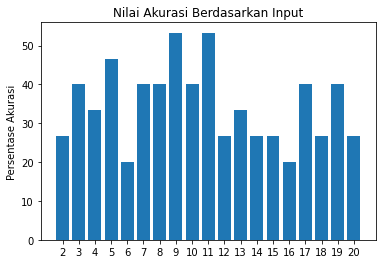

In [37]:
from matplotlib import pyplot as plt
plt.bar(listnum, listacc)
plt.xticks(listnum)
plt.title('Nilai Akurasi Berdasarkan Input')
plt.ylabel('Persentase Akurasi')